In [10]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [3]:
# Concatenate the features and target labels into a single DataFrame
data = pd.DataFrame(data=X_train, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
                                           "AGE", "DIS", "RAD", "TAX", "PTRATIO",
                                           "B", "LSTAT"])
data["PRICE"] = y_train

1. CRIM: Per capita crime rate by town.
2. ZN: Proportion of residential land zoned for lots over 25,000 square feet.
3. INDUS: Proportion of non-retail business acres per town.
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. NOX: Nitric oxides concentration (parts per 10 million).
6. RM: Average number of rooms per dwelling.
7. AGE: Proportion of owner-occupied units built prior to 1940.
8. DIS: Weighted distances to five Boston employment centers.
9. RAD: Index of accessibility to radial highways.
10. TAX: Full-value property tax rate per 10,000
11. PTRATIO: Pupil-teacher ratio by town.
12. B: 1000(Bk - 0.63)^2, where Bk is the proportion of people of African American descent by town.
13. LSTAT: Percentage of lower status of the population.
14. PRICE: Median value of owner-occupied homes in $1000s (the target variable to predict).

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [7]:
tf.random.set_seed(42)

boston_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
boston_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                        metrics=['mae'])

# Fit the model
history = boston_model.fit(X_train, y_train, epochs=100, verbose=0)

In [8]:
boston_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 5.2145 - mae: 5.2145


[5.214507579803467, 5.214507579803467]

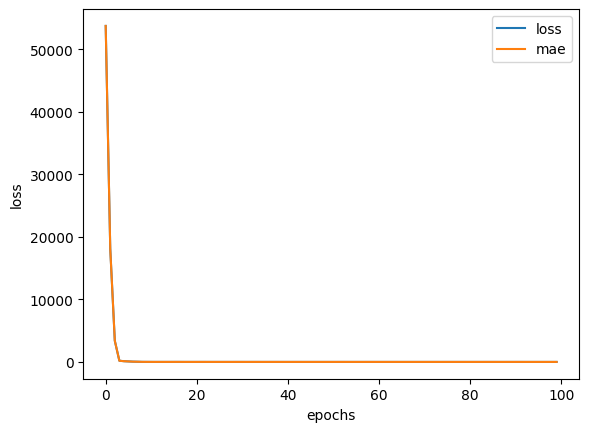

In [11]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [12]:
history_2 = boston_model.fit(X_train, y_train, epochs=100, verbose=0)

In [13]:
boston_model_loss, boston_model_mae = boston_model.evaluate(X_test, y_test)
boston_model_loss, boston_model_mae

4/4 [==============================] - 0s 6ms/step - loss: 4.5603 - mae: 4.5603


(4.560278415679932, 4.560278415679932)

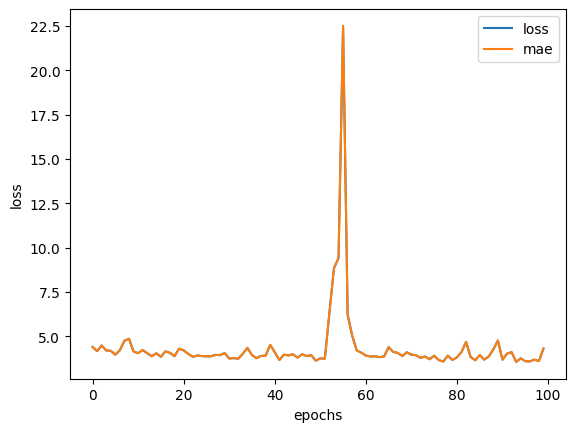

In [14]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");